In [11]:
# finished installations

In [12]:
# # IMPORTS

import warnings
warnings.filterwarnings('ignore')

# operations
import numpy as np 
import pandas as pd 
import joypy

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
from pandas.plotting import parallel_coordinates
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
from bubbly.bubbly import bubbleplot
import plotly_express as px

# for providing path
import os

# for modelling
import sklearn
import imblearn

# for model explanation
import shap 
import eli5

In [13]:
data = pd.read_csv('health_insurance_claims.csv')
data.head()

p_fname   p_lname  months_as_customer  age  policy_number  \
0  Balthazzar  Carrillo                 328   48         521585   
1      Hailey   Watkins                 228   42         342868   
2      Aberah   Kennedy                 134   29         687698   
3      Dexter  Chandler                 256   41         227811   
4       Rajah   Maxwell                 228   44         367455   

  policy_bind_date policy_state policy_csl  policy_deductable  \
0       17-10-2014           OH    250/500               1000   
1       27-06-2006           IN    250/500               2000   
2       06-09-2000           OH    100/300               2000   
3       25-05-1990           IL    250/500               2000   
4       06-06-2014           IL   500/1000               1000   

   policy_annual_premium  ...  medical_staff  claim_status_category_code  \
0                1406.91  ...              2                          F1   
1                1197.22  ...              0                           ?   
2                1413.14  ...              3                         F3F   
3                1415.74  ...              2                         F3F   
4                1583.91  ...              1                         F3F   

  total_claim_amount board_claim pharmacy_claim doctor_consultation_claim  \
0              71610        6510          13020                     52080   
1               5070         780            780                      3510   
2              34650        7700           3850                     23100   
3              63400        6340           6340                     50720   
4               6500        1300            650                      4550   

     reason  reason_type  diagnosed_year fraud_reported  
0  Cataract          92x            2004              Y  
1       ALS         E400            2007              Y  
2     Liver          L72            2007              N  
3     Lungs        LN142            2014              Y  
4    Kidney          RSX            2009              N  

[5 rows x 41 columns]

In [14]:
data.shape

(1000, 41)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   p_fname                       1000 non-null   object 
 1   p_lname                       1000 non-null   object 
 2   months_as_customer            1000 non-null   int64  
 3   age                           1000 non-null   int64  
 4   policy_number                 1000 non-null   int64  
 5   policy_bind_date              1000 non-null   object 
 6   policy_state                  1000 non-null   object 
 7   policy_csl                    1000 non-null   object 
 8   policy_deductable             1000 non-null   int64  
 9   policy_annual_premium         1000 non-null   float64
 10  umbrella_limit                1000 non-null   int64  
 11  insured_zip                   1000 non-null   int64  
 12  insured_sex                   1000 non-null   object 
 13  insu

In [16]:
data.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_severity  hospitalized_hour_of_the_day  \
count    1000.000000        1000.000000                   1000.000000   
mean   -26793.700000           3.656000                     11.644000   
std     28104.096686           1.151951                      6.951373   
min   -111100.000000           1.000000                      0.000000   
25%    -51500.000000           3.000000                      6.000000   
50%    -23250.000000           4.000000                     12.000000   
75%         0.000000           5.000000                     17.000000   
max         0.000000           5.000000                     23.000000   

       status_when_brought_in  duration_of_hospitalization  medical_staff  \
count              1000.00000                  1000.000000    1000.000000   
mean                  1.83900                     0.992000       1.487000   
std                   1.01888                     0.820127       1.111335   
min                   1.00000                     0.000000       0.000000   
25%                   1.00000                     0.000000       1.000000   
50%                   1.00000                     1.000000       1.000000   
75%                   3.00000                     2.000000       2.000000   
max                   4.00000                     2.000000       3.000000   

       total_claim_amount   board_claim  pharmacy_claim  \
count          1000.00000   1000.000000     1000.000000   
mean          52761.94000   7433.420000     7399.570000   
std           26401.53319   4880.951853     4824.726179   
min             100.00000      0.000000        0.000000   
25%           41812.50000   4295.000000     4445.000000   
50%           58055.00000   6775.000000     6750.000000   
75%           70592.50000  11305.000000    10885.000000   
max          114920.00000  21450.000000    23670.000000   

       doctor_consultation_claim  diagnosed_year  
count                1000.000000     1000.000000  
mean                37928.950000     2005.103000  
std                 18886.252893        6.015861  
min                    70.000000     1995.000000  
25%                 30292.500000     2000.000000  
50%                 42100.000000     2005.000000  
75%                 50822.500000     2010.000000  
max                 79560.000000     2015.000000

In [17]:
data.corr()

months_as_customer       age  policy_number  \
months_as_customer                      1.000000  0.922098       0.057555   
age                                     0.922098  1.000000       0.059413   
policy_number                           0.057555  0.059413       1.000000   
policy_deductable                       0.026807  0.029188      -0.006738   
policy_annual_premium                   0.005018  0.014404       0.022566   
umbrella_limit                          0.015498  0.018126       0.008968   
insured_zip                             0.017895  0.025604       0.007083   
capital-gains                           0.006399 -0.007075       0.009802   
capital-loss                            0.020209  0.007368      -0.005669   
incident_severity                       0.016646  0.021591      -0.025347   
hospitalized_hour_of_the_day            0.070639  0.087161       0.000113   
status_when_brought_in                  0.014736  0.022102       0.013432   
duration_of_hospitalization            -0.010162 -0.015679      -0.004558   
medical_staff                           0.058383  0.052359      -0.012661   
total_claim_amount                      0.062108  0.069863      -0.018009   
board_claim                             0.065329  0.075522      -0.008762   
pharmacy_claim                          0.034940  0.060898      -0.010678   
doctor_consultation_claim               0.061013  0.062588      -0.020184   
diagnosed_year                         -0.000292  0.001354      -0.000183   

                              policy_deductable  policy_annual_premium  \
months_as_customer                     0.026807               0.005018   
age                                    0.029188               0.014404   
policy_number                         -0.006738               0.022566   
policy_deductable                      1.000000              -0.003245   
policy_annual_premium                 -0.003245               1.000000   
umbrella_limit                         0.010870              -0.006247   
insured_zip                            0.004545               0.032354   
capital-gains                          0.035212              -0.013738   
capital-loss                          -0.023544               0.023547   
incident_severity                      0.016735               0.025514   
hospitalized_hour_of_the_day           0.060935              -0.001578   
status_when_brought_in                 0.051214              -0.045991   
duration_of_hospitalization           -0.022765               0.026780   
medical_staff                          0.066639               0.002332   
total_claim_amount                     0.022839               0.009094   
board_claim                            0.039107              -0.017633   
pharmacy_claim                         0.064792              -0.011654   
doctor_consultation_claim              0.005269               0.020246   
diagnosed_year                         0.026105              -0.049226   

                              umbrella_limit  insured_zip  capital-gains  \
months_as_customer                  0.015498     0.017895       0.006399   
age                                 0.018126     0.025604      -0.007075   
policy_number                       0.008968     0.007083       0.009802   
policy_deductable                   0.010870     0.004545       0.035212   
policy_annual_premium              -0.006247     0.032354      -0.013738   
umbrella_limit                      1.000000     0.019671      -0.047268   
insured_zip                         0.019671     1.000000       0.006303   
capital-gains                      -0.047268     0.006303       1.000000   
capital-loss                       -0.024056     0.049372      -0.046904   
incident_severity                  -0.043216    -0.057496       0.030138   
hospitalized_hour_of_the_day       -0.023257     0.008274      -0.016406   
status_when_brought_in             -0.021270     0.027448       0.061643   
duration_of_hospital

In [18]:
data.cov()

months_as_customer            age  \
months_as_customer                  1.325104e+04     970.201810   
age                                 9.702018e+02      83.544841   
policy_number                       1.703130e+06  139599.665361   
policy_deductable                   1.888144e+03     163.235235   
policy_annual_premium               1.410315e+02      32.145675   
umbrella_limit                      4.098745e+06  380632.632633   
insured_zip                         1.476998e+05   16780.292669   
capital-gains                       2.053193e+04   -1802.445245   
capital-loss                        6.537987e+04    1892.620220   
incident_severity                   2.207383e+00       0.227339   
hospitalized_hour_of_the_day        5.652515e+01       5.538026   
status_when_brought_in              1.728322e+00       0.205834   
duration_of_hospitalization        -9.593273e-01      -0.117534   
medical_staff                       7.468871e+00       0.531856   
total_claim_amount                  1.887564e+05   16859.079960   
board_claim                         3.670575e+04    3369.297137   
pharmacy_claim                      1.940521e+04    2685.543183   
doctor_consultation_claim           1.326454e+05   10804.239640   
diagnosed_year                     -2.024645e-01       0.074430   

                              policy_number  policy_deductable  \
months_as_customer             1.703130e+06       1.888144e+03   
age                            1.395997e+05       1.632352e+02   
policy_number                  6.608139e+10      -1.059731e+06   
policy_deductable             -1.059731e+06       3.743784e+05   
policy_annual_premium          1.416366e+06      -4.848613e+02   
umbrella_limit                 5.296036e+09       1.527928e+07   
insured_zip                    1.305565e+08       1.993895e+05   
capital-gains                  7.023384e+07       6.005009e+05   
capital-loss                  -4.095652e+07      -4.048617e+05   
incident_severity             -7.505852e+03       1.179580e+01   
hospitalized_hour_of_the_day   2.013220e+02       2.591752e+02   
status_when_brought_in         3.518009e+03       3.192793e+01   
duration_of_hospitalization   -9.610359e+02      -1.142342e+01   
medical_staff                 -3.617162e+03       4.531331e+01   
total_claim_amount            -1.222275e+08       3.689501e+05   
board_claim                   -1.099333e+07       1.167917e+05   
pharmacy_claim                -1.324355e+07       1.912697e+05   
doctor_consultation_claim     -9.799063e+07       6.088869e+04   
diagnosed_year                -2.829887e+02       9.608809e+01   

                              policy_annual_premium  umbrella_limit  \
months_as_customer                     1.410315e+02    4.098745e+06   
age                                    3.214568e+01    3.806326e+05   
policy_number                          1.416366e+06    5.296036e+09   
policy_deductable                     -4.848613e+02    1.527928e+07   
policy_annual_premium                  5.961772e+04   -3.504155e+06   
umbrella_limit                        -3.504155e+06    5.278077e+12   
insured_zip                            5.664307e+05    3.240420e+09   
capital-gains                         -9.349637e+04   -3.026763e+09   
capital-loss                           1.615803e+05   -1.553189e+09   
incident_severity                      7.176252e+00   -1.143704e+05   
hospitalized_hour_of_the_day          -2.678940e+00   -3.714154e+05   
status_when_brought_in                -1.144158e+01   -4.978879e+04   
duration_of_hospitalization            5.362622e+00    4.285085e+04   
medical_staff                          6.326876e-01   -1.720420e+04   
total_claim_amount                     5.862176e+04   -2.447073e+09   
board_claim                           -2.101409e+04   -5.092246e+08   
pharmacy_claim                        -1.372875e+04   -2.637003e+08   
doctor_consultation_claim              9.336460e+04   -1.674148e+09   
diagnosed_year     

# Data Cleaning

In [19]:
data = data.replace('?',np.NaN)

data.isnull().any()

p_fname                         False
p_lname                         False
months_as_customer              False
age                             False
policy_number                   False
policy_bind_date                False
policy_state                    False
policy_csl                      False
policy_deductable               False
policy_annual_premium           False
umbrella_limit                  False
insured_zip                     False
insured_sex                     False
insured_education_level         False
insured_occupation              False
insured_hobbies                 False
insured_relationship            False
capital-gains                   False
capital-loss                    False
hospitalized_date               False
type_of_admission               False
type_of_visit                    True
incident_severity               False
source_of_admission             False
hospital_state                  False
hospital_city                   False
service_prov

In [20]:
# # FILLING MISSING VALUES
data['type_of_visit'].fillna(data['type_of_visit'].mode()[0], inplace = True)
data['survival_status'].fillna('YES', inplace = True)
data['claim_status_category_code'].fillna('F0', inplace = True)

data.isnull().any().any()

False

# Data Visualizations

In [21]:
fig = px.scatter(data, x = 'total_claim_amount', y = 'policy_annual_premium', color = 'insured_sex',
                marginal_x = 'rug', marginal_y = 'histogram')
fig.show()

In [22]:
fig = px.scatter_matrix(data, dimensions=["board_claim", "pharmacy_claim", "doctor_consultation_claim"],
                        color = "insured_sex")
fig.show()

In [23]:
fig = px.parallel_categories(data, color="total_claim_amount", color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

In [24]:
fraud = data['fraud_reported'].value_counts()

label_fraud = fraud.index
size_fraud = fraud.values

colors = ['silver', 'gold']
trace = go.Pie(labels = label_fraud, values = size_fraud, marker = dict(colors = colors), name = 'Frauds', hole = 0.3)

df = [trace]
layout = go.Layout(title = 'Distribution of Frauds')

fig = go.Figure(data = df, layout = layout)

py.iplot(fig)

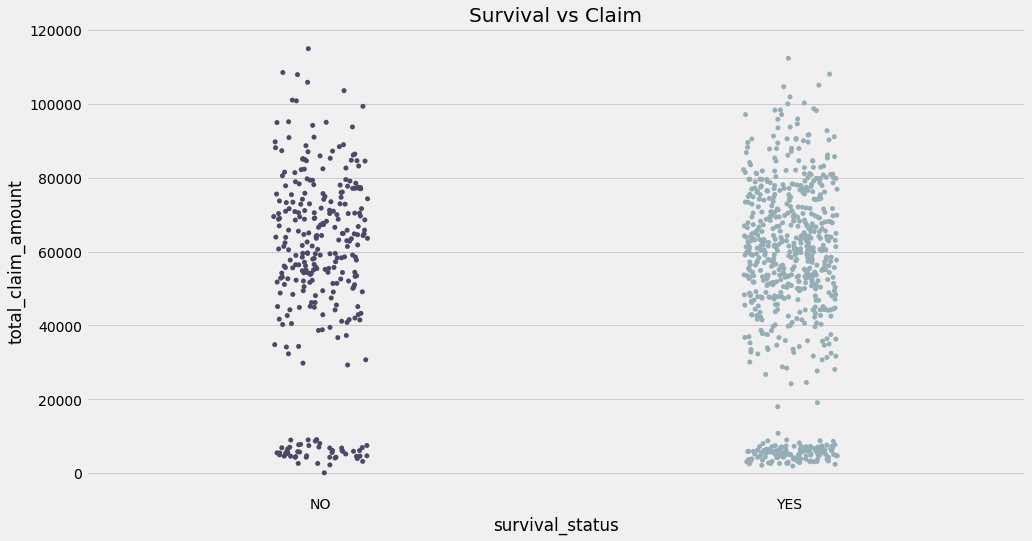

In [25]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.stripplot(data['survival_status'], data['total_claim_amount'], palette = 'bone')
plt.title('Survival vs Claim', fontsize = 20)
plt.show()

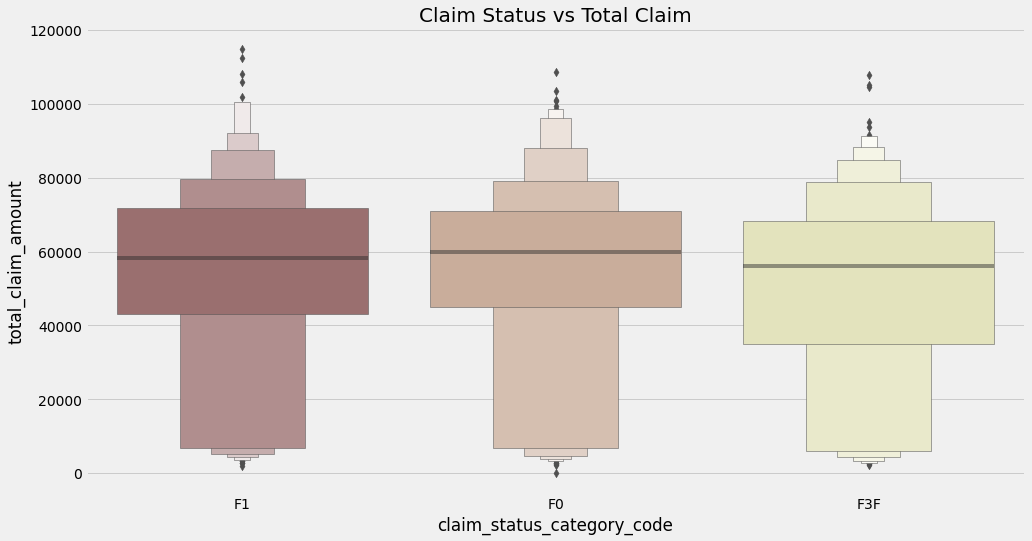

In [26]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.boxenplot(data['claim_status_category_code'], data['total_claim_amount'], palette = 'pink')
plt.title('Claim Status vs Total Claim', fontsize = 20)
plt.show()

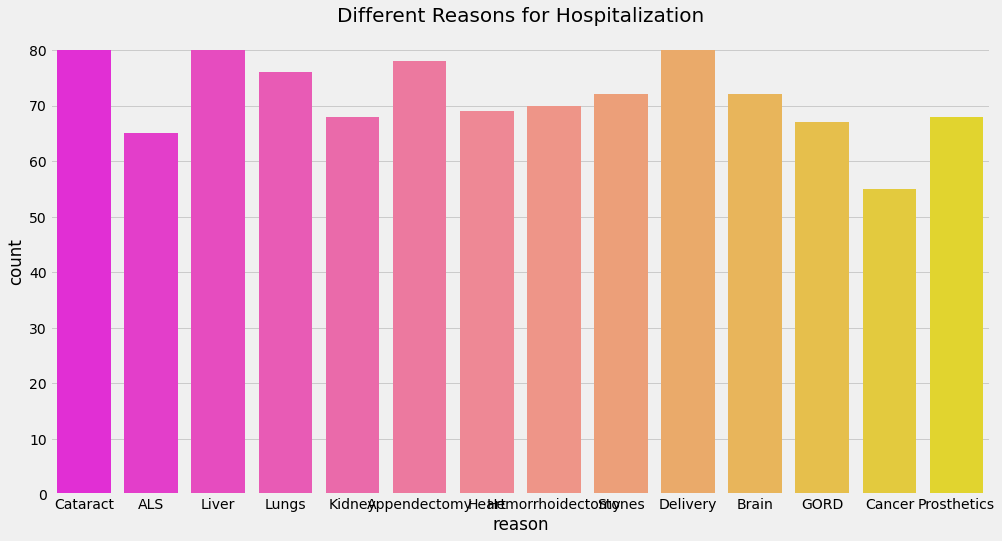

In [27]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['reason'], palette = 'spring')
plt.title('Different Reasons for Hospitalization', fontsize = 20)
plt.show()

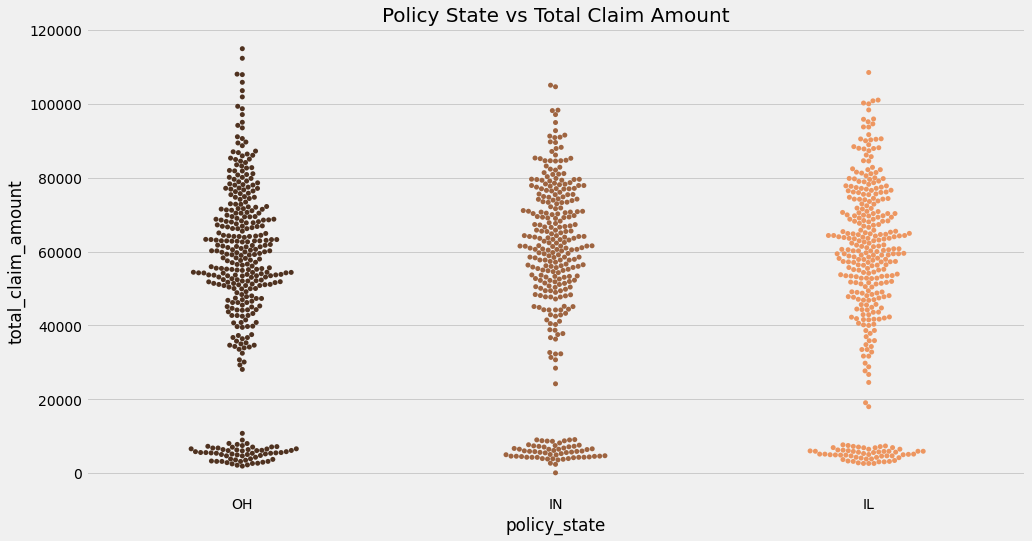

In [28]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.swarmplot(data['policy_state'], data['total_claim_amount'], palette = 'copper')
plt.title('Policy State vs Total Claim Amount', fontsize = 20)
plt.show()

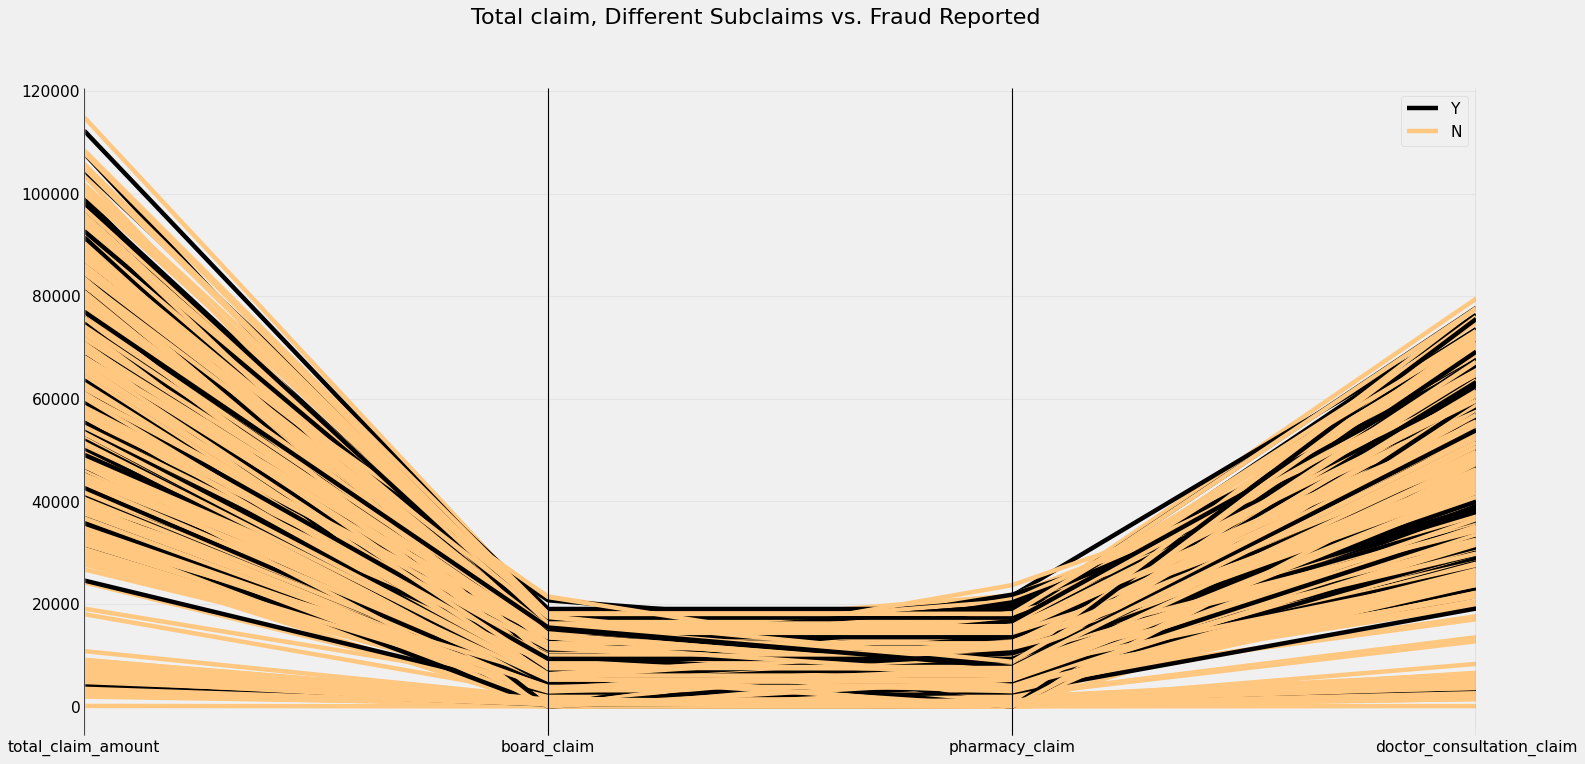

In [29]:
plt.figure(figsize=(20, 10), dpi= 80)

parallel_coordinates(data[['total_claim_amount','board_claim', 'pharmacy_claim','doctor_consultation_claim','fraud_reported']],
                     'fraud_reported',  colormap = 'copper')

plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.grid(alpha=0.3)


plt.suptitle('Total claim, Different Subclaims vs. Fraud Reported', fontsize = 20)
plt.show()

In [30]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = data, x_column = 'policy_annual_premium', y_column = 'total_claim_amount', 
    bubble_column = 'insured_sex', time_column = 'diagnosed_year', size_column = 'months_as_customer', color_column = 'insured_sex', 
    x_title = "Annual Policy Premium", y_title = "Total Claim Amount", title = 'Annual Premium vs Total Claim Amount vs Months as Customer',
    x_logscale = False, scale_bubble = 3, height = 650)

py.iplot(figure, config={'scrollzoom': True})

In [31]:
sex = data['insured_sex'].value_counts()
rel = data['insured_relationship'].value_counts()

label_sex = sex.index
size_sex = sex.values

label_rel = rel.index
size_rel = rel.values

colors = ['aqua', 'gold']
trace = go.Pie(
         labels = label_sex, values = size_sex, marker = dict(colors = colors), name = 'Gender', hole = 0.3)

colors2 = ['pink', 'lightblue','lightgreen','grey','red']
trace2 = go.Pie(labels = label_rel, values = size_rel, marker = dict(colors = colors2), name = 'Relationship',
                hole = 0.3)

df = [trace]
df2 = [trace2]

layout1 = go.Layout(
           title = 'Gender of the Customers')
layout2 = go.Layout(
           title = 'Relationship')

fig = go.Figure(data = df, layout = layout1)
fig2 = go.Figure(data = df2, layout = layout2)
py.iplot(fig)
py.iplot(fig2)

In [32]:
trace = go.Histogram(
          x = data['policy_annual_premium'],
          
          #fill = 'tozeroy',
          marker = dict(
                 color = 'rgb(100, 75, 25, 0.5)'
          )
)
df = [trace]

layout = go.Layout(
    title = 'Distribution of Annual Policy among the Customers',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Count')
        ))

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

In [33]:
trace = go.Histogram(
          x = data['age'],
          
          #fill = 'tozeroy',
          marker = dict(
                 color = 'rgb(215, 245, 5, 0.5)'
          )
)
df = [trace]

layout = go.Layout(
    title = 'Distribution of Age among the Customers',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Count')
        ))

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

In [34]:
trace = go.Scatter3d(
    x = data['age'],
    y = data['pharmacy_claim'],
    z = data['doctor_consultation_claim'],
    mode = 'markers',
    marker = dict(
         size = 10,
         color = data['age']
    )
)

df = [trace]

layout = go.Layout(
    title = 'Pharmacy Charges vs Doctor Charges vs Age',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Pharmacy Charges'),
            zaxis = dict(title  = 'Doctor Charges')
        )
    
)
fig = go.Figure(data = df, layout=layout)
py.iplot(fig)

# Data Processing

In [35]:
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'], errors = 'coerce')

In [36]:
data['fraud_reported'] = data['fraud_reported'].replace(('Y','N'),(0,1))

In [37]:
data[['reason_type','fraud_reported']].groupby(['reason_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)


reason_type  fraud_reported
5         B123        0.944444
29         RSX        0.916667
20          L1        0.900000
19          J5        0.880952
2          A12        0.869565
17        H763        0.857143
16        H445        0.850000
10       CR362        0.850000
12          D2        0.843750
21         L14        0.837838
9          C93        0.807692
33          TL        0.800000
3           A3        0.794118
26         MDX        0.777778
8         C736        0.769231
18          J1        0.760000
32          S9        0.750000
13        E400        0.740741
15          H1        0.727273
28          P1        0.720588
31          S2        0.714286
0          92x        0.714286
1           A1        0.708333
11          D1        0.708333
34          X5        0.695652
22         L72        0.674419
25          M5        0.666667
30          S1        0.666667
4           A5        0.656250
7         C633        0.636364
24       LN142        0.625000
14        F150        0.625000
6         C300        0.611111
27       ML350        0.600000
23       LN132        0.590909
35          X6        0.562500

In [38]:
data['reason_type'] = data['reason_type'].replace(('B123','RSX','L1','J5','A12','H763',
                                'H445','CR362','D2','L14','C93','TL','A3','MDX','C736','J1','S9','E400',
                                                   'H1','P1','S2','92x','A1','D1','X5','L72','M5','S1','A5',
                                                   'C633','LN142','F150','C300','ML350','LN132','X6'),
            (0.95,0.91, 0.90,0.88,0.87,0.86,0.85,0.85,0.84,0.83,0.81,0.80,0.78,0.77,0.77,0.76,0.75,0.74,
                 0.73,0.72,0.71,0.71,0.71,0.71,0.70,0.68,0.67,0.67,0.66,0.64,0.62,0.62,0.61,0.60,0.59,0.56))

In [39]:
data[['reason','fraud_reported']].groupby(['reason'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

reason  fraud_reported
6               GORD        0.835821
1       Appendectomy        0.820513
8   Hemorrhoidectomy        0.814286
9             Kidney        0.808824
4           Cataract        0.775000
5           Delivery        0.762500
10             Liver        0.750000
3             Cancer        0.745455
11             Lungs        0.723684
2              Brain        0.722222
12       Prosthetics        0.720588
7              Heart        0.695652
13            Stones        0.694444
0                ALS        0.661538

In [40]:
data['reason'] = data['reason'].replace(('GORD','Appendectomy','Hemorrhoidectomy','Kidney','Cataract','Delivery',
                                'Liver','Cancer','Lungs','Brain','Prosthetics','Heart','Stones','ALS'),
                                              (0.84,0.82,0.81,0.80,0.77,0.76,0.75,0.74,0.73,0.72,0.71,0.69,0.69,0.66))

In [41]:
data[['claim_status_category_code','fraud_reported']].groupby(['claim_status_category_code'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

claim_status_category_code  fraud_reported
1                         F1        0.770701
2                        F3F        0.749271
0                         F0        0.740525

In [42]:
data['claim_status_category_code'] = data['claim_status_category_code'].replace(('F1','F3F','F0'),(0.77,0.75,0.74))

In [43]:
data[['survival_status','fraud_reported']].groupby(['survival_status'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

survival_status  fraud_reported
1             YES        0.757880
0              NO        0.741722

In [44]:
data['survival_status'] = data['survival_status'].replace(('NO','YES'),(0.76,0.74))

In [45]:
data[['hospital_city','fraud_reported']].groupby(['hospital_city'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

hospital_city  fraud_reported
4    Northbrook        0.778689
5     Riverwood        0.776119
3     Northbend        0.765517
6   Springfield        0.757962
2     Hillsdale        0.751773
1      Columbus        0.738255
0     Arlington        0.710526

In [46]:
data['hospital_city'] = data['hospital_city'].replace(('Northbrook','Riverwood','Northbend','Springfield',
                                    'Hillsdale','Columbus','Arlington'),(0.78,0.77,0.76,0.75,0.74,0.73,0.71))

In [47]:
data[['hospital_state','fraud_reported']].groupby(['hospital_state'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

hospital_state  fraud_reported
6             WV        0.820276
1             NY        0.778626
5             VA        0.772727
3             PA        0.733333
4             SC        0.705645
0             NC        0.690909
2             OH        0.565217

In [48]:
data['hospital_state'] = data['hospital_state'].replace(('WV','NY','VA','PA','SC','NC','OH'),
                                                        (0.82,0.77,0.76,0.73,0.70,0.69,0.56))

In [49]:
data[['source_of_admission','fraud_reported']].groupby(['source_of_admission'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

source_of_admission  fraud_reported
3                None        1.000000
5                Self        0.933333
2            Neighbor        0.791096
1              Family        0.730942
0           Ambulance        0.709184
4               Other        0.681818

In [50]:
data['source_of_admission'] = data['source_of_admission'].replace(('None','Self','Neighbor','Family','Ambulance','Other'),
                                                                      (1.0,0.93,0.79,0.73,0.70,0.68))

In [51]:
data[['incident_severity','fraud_reported']].groupby(['incident_severity'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

incident_severity  fraud_reported
0                  1        0.933333
1                  3        0.892655
3                  5        0.871429
2                  4        0.394928

In [52]:
data['incident_severity'] = data['incident_severity'].replace((1,3,5,4),(0.94,0.89,0.87,0.39))

In [53]:
data[['type_of_visit','fraud_reported']].groupby(['type_of_visit'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

type_of_visit  fraud_reported
1           V67        0.772340
0           V55        0.746377
2           V73        0.724409

In [54]:
data['type_of_visit'] = data['type_of_visit'].replace(('V67', 'V55', 'V73'),(0.78,0.74,0.72))

In [55]:
data[['type_of_admission','fraud_reported']].groupby(['type_of_admission'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

type_of_admission  fraud_reported
1               AD3        0.914894
2               AD6        0.904762
3               AD8        0.727924
0               AD1        0.709677

In [56]:
data['type_of_admission'] = data['type_of_admission'].replace(('AD3','AD6','AD8','AD1'),(0.91, 0.90, 0.72,0.70))

In [57]:
data['hospitalized_date'] = pd.to_datetime(data['hospitalized_date'], errors = 'coerce')

# extracting day and month
data['hospitalized_month'] = data['hospitalized_date'].dt.month
data['hospitalized_day'] = data['hospitalized_date'].dt.day

In [58]:
data[['insured_relationship','fraud_reported']].groupby(['insured_relationship'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

insured_relationship  fraud_reported
0              husband        0.794118
3            own-child        0.786885
4            unmarried        0.758865
1        not-in-family        0.741379
5                 wife        0.729032
2       other-relative        0.706215

In [59]:
data['insured_relationship'] = data['insured_relationship'].replace(('husband','own-child','unmarried',
                                        'not-in-family','wife','other-relative'),(0.79,0.78,0.75,0.74,0.72,0.70))

In [60]:
data[['insured_hobbies','fraud_reported']].groupby(['insured_hobbies'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

insured_hobbies  fraud_reported
4          camping        0.909091
11        kayaking        0.907407
9             golf        0.890909
7          dancing        0.883721
3   bungie-jumping        0.839286
12          movies        0.836364
1       basketball        0.823529
8         exercise        0.807018
17        sleeping        0.804878
18     video-games        0.800000
16       skydiving        0.775510
13       paintball        0.771930
10          hiking        0.769231
0     base-jumping        0.734694
15         reading        0.734375
14            polo        0.723404
2      board-games        0.708333
19        yachting        0.698113
6        cross-fit        0.257143
5            chess        0.173913

In [61]:
data['insured_hobbies'] = data['insured_hobbies'].replace(('camping', 'kayaking', 'golf','dancing',
        'bungie-jumping','movies', 'basketball','exercise','sleeping','video-games','skydiving','paintball',
            'hiking','base-jumping','reading','polo','board-games','yachting', 'cross-fit','chess'),(0.91, 0.90,
                0.89, 0.88,0.84,0.83,0.82,0.81,0.805,0.80,0.78,0.77,0.76,0.73,0.73,0.72,0.70,0.69,0.25,0.17))

In [62]:
data[['insured_occupation','fraud_reported']].groupby(['insured_occupation'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

insured_occupation  fraud_reported
7       other-service        0.830986
8     priv-house-serv        0.830986
0        adm-clerical        0.830769
5   handlers-cleaners        0.796296
9      prof-specialty        0.788235
10    protective-serv        0.777778
6   machine-op-inspct        0.763441
1        armed-forces        0.753623
11              sales        0.723684
12       tech-support        0.717949
13   transport-moving        0.708333
2        craft-repair        0.702703
4     farming-fishing        0.698113
3     exec-managerial        0.631579

In [63]:
data['insured_occupation'] = data['insured_occupation'].replace(('other-service','priv-house-serv',
                        'adm-clerical','handlers-cleaners','prof-specialty','protective-serv',
                'machine-op-inspct','armed-forces','sales','tech-support','transport-moving','craft-repair',
                    'farming-fishing','exec-managerial'),(0.84, 0.84,0.83, 0.79,0.78,0.77,0.76,0.75,0.72,0.71,
                                                          0.705,0.70,0.69,0.63))

In [64]:
data[['insured_education_level','fraud_reported']].groupby(['insured_education_level'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

insured_education_level  fraud_reported
5                 Masters        0.776224
2             High School        0.775000
0               Associate        0.765517
3                      JD        0.739130
1                 College        0.737705
4                      MD        0.736111
6                     PhD        0.736000

In [65]:
data['insured_education_level'] = data['insured_education_level'].replace(('Masters', 'High School','Associate',
                                        'JD','College', 'MD','PhD'),(0.78,0.77,0.76,0.74,0.73,0.72,0.71))

In [66]:
data[['insured_sex','fraud_reported']].groupby(['insured_sex'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

insured_sex  fraud_reported
0      FEMALE        0.765363
1        MALE        0.738661

In [67]:
data['insured_sex'] = data['insured_sex'].replace(('FEMALE','MALE'),(0.76,0.73))

In [68]:
# csl - combined single limit
data[['policy_csl','fraud_reported']].groupby(['policy_csl'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

policy_csl  fraud_reported
2   500/1000        0.783333
0    100/300        0.742120
1    250/500        0.737892

In [69]:
data['policy_csl'] = data['policy_csl'].replace(('500/1000','100/300','250/500'),(0.78,0.74,0.73))

In [70]:
data[['policy_state','fraud_reported']].groupby(['policy_state'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

policy_state  fraud_reported
0           IL        0.772189
1           IN        0.745161
2           OH        0.741477

In [71]:
data['policy_state'] = data['policy_state'].replace(('IL','IN','OH'),(0.77,0.745,0.74))

In [72]:
data[['service_provider','fraud_reported']].groupby(['service_provider'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

service_provider  fraud_reported
2   Long Island Medical Arts        0.778689
0       Francis W Iacobellis        0.776119
1        Lenox Hill Hospital        0.765517
6               Otis M Jones        0.757962
4  Ms St Lukes And Roosevelt        0.751773
3       Mount Sinai Hospital        0.738255
5          Nyp-Weill Cornell        0.710526

In [73]:
data['service_provider'] = data['service_provider'].replace(('Long Island Medical Arts','Francis W Iacobellis',
                            'Lenox Hill Hospital','Otis M Jones','Ms St Lukes And Roosevelt',
                                   'Mount Sinai Hospital','Nyp-Weill Cornell'),
                                                (0.778,0.776,0.765,0.757,0.751,0.74,0.71))

In [74]:
data.columns

Index(['p_fname', 'p_lname', 'months_as_customer', 'age', 'policy_number',
       'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'hospitalized_date', 'type_of_admission', 'type_of_visit',
       'incident_severity', 'source_of_admission', 'hospital_state',
       'hospital_city', 'service_provider', 'hospitalized_hour_of_the_day',
       'status_when_brought_in', 'survival_status',
       'duration_of_hospitalization', 'medical_staff',
       'claim_status_category_code', 'total_claim_amount', 'board_claim',
       'pharmacy_claim', 'doctor_consultation_claim', 'reason', 'reason_type',
       'diagnosed_year', 'fraud_reported', 'hospitalized_month',
       'hospitalized_day'],
      dtype='object')

In [75]:
data = data.drop(['p_fname','p_lname','policy_number','hospitalized_date','policy_bind_date','claim_status_category_code'],axis = 1)

In [76]:
x = data.drop(['fraud_reported'], axis = 1)
y = data['fraud_reported']

x.to_csv('x.csv',index=False)
y.to_csv('y.csv',index=False)

print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (1000, 36)
Shape of y : (1000,)


In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (800, 36)
Shape of x_test : (200, 36)
Shape of y_train : (800,)
Shape of y_test : (200,)


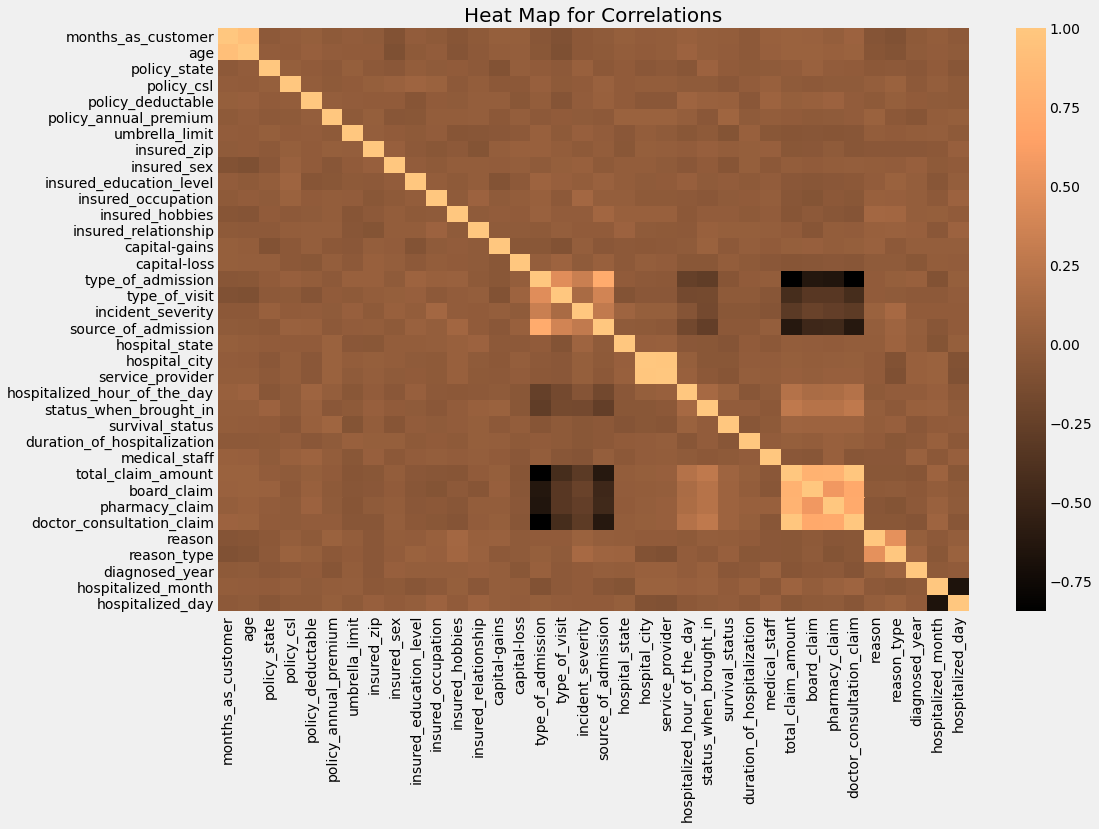

In [78]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(x_train.corr(), cmap = 'copper')
plt.title('Heat Map for Correlations', fontsize = 20)
plt.show()

# MODELLING

#### Random Forest Classifier

Training Accuracy:  0.89625
Testing Accuarcy:  0.845
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        57
           1       0.92      0.85      0.89       143

    accuracy                           0.84       200
   macro avg       0.81      0.84      0.82       200
weighted avg       0.86      0.84      0.85       200



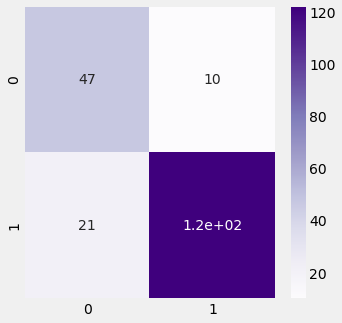

In [79]:
from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
                 

model = BalancedRandomForestClassifier(n_estimators = 100, random_state = 0)

model.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

cr = classification_report(y_test,  y_pred_rf)
print(cr)

# confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'Purples')
plt.show()

#### Easy Ensemble Classifier

Training Accuracy:  0.86125
Testing Accuarcy:  0.845
              precision    recall  f1-score   support

           0       0.70      0.81      0.75        57
           1       0.92      0.86      0.89       143

    accuracy                           0.84       200
   macro avg       0.81      0.83      0.82       200
weighted avg       0.85      0.84      0.85       200



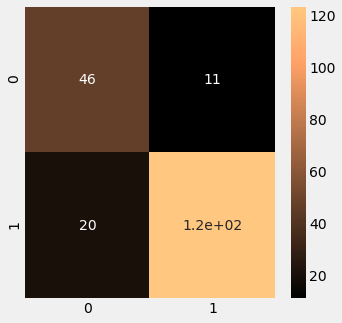

In [80]:
from imblearn.ensemble import EasyEnsembleClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
                 

model1 = EasyEnsembleClassifier(n_estimators = 100, random_state = 0)

model1.fit(x_train, y_train)
y_pred_ef = model1.predict(x_test)

print("Training Accuracy: ", model1.score(x_train, y_train))
print('Testing Accuarcy: ', model1.score(x_test, y_test))

cr = classification_report(y_test,  y_pred_ef)
print(cr)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_ef)
sns.heatmap(cm, annot = True, cmap = 'copper')
plt.show()

#### Bagging Classifier

Training Accuracy:  0.935
Testing Accuarcy:  0.855
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        57
           1       0.92      0.87      0.90       143

    accuracy                           0.85       200
   macro avg       0.82      0.84      0.83       200
weighted avg       0.86      0.85      0.86       200



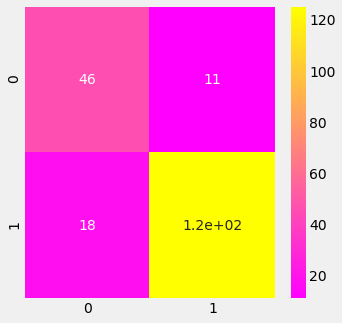

In [81]:
from imblearn.ensemble import BalancedBaggingClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
                 

model2 = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(),
                                 sampling_strategy = 'auto',
                                 replacement = False,
                                 random_state = 0)

model2.fit(x_train, y_train)
y_pred_bc = model2.predict(x_test)

print("Training Accuracy: ", model2.score(x_train, y_train))
print('Testing Accuarcy: ', model2.score(x_test, y_test))

cr = classification_report(y_test,  y_pred_bc)
print(cr)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_bc)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()

#### Boosting Prediction

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        57
           1       0.92      0.85      0.89       143

    accuracy                           0.84       200
   macro avg       0.81      0.84      0.82       200
weighted avg       0.86      0.84      0.85       200



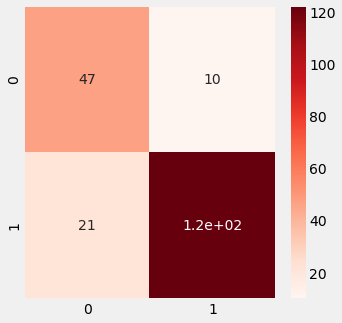

In [82]:
y_pred = y_pred_rf*0.5 + y_pred_ef*0.2 + y_pred_bc*0.3

y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

cr = classification_report(y_test,  y_pred)
print(cr)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.show()

#### Voting Classifier

              precision    recall  f1-score   support

           0       0.71      0.84      0.77        57
           1       0.93      0.86      0.89       143

    accuracy                           0.85       200
   macro avg       0.82      0.85      0.83       200
weighted avg       0.87      0.85      0.86       200



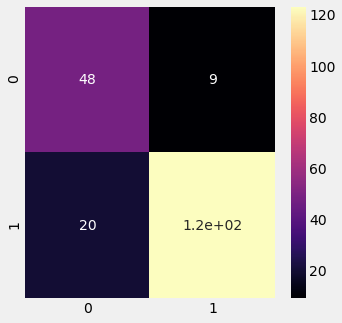

In [83]:
from sklearn.ensemble import VotingClassifier

vote_est = [ 
    ('brf', BalancedRandomForestClassifier()),
    ('bc', BalancedBaggingClassifier()),
    ('eec',EasyEnsembleClassifier())]

voting = VotingClassifier(estimators = vote_est , voting = 'soft')
voting.fit(x_train, y_train)

y_pred = voting.predict(x_test).astype(int)

cr = classification_report(y_test,  y_pred)
print(cr)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'magma')
plt.show()

# Applying Sampling Techniques

#### Under Sampling

In [84]:
y.value_counts()

1    753
0    247
Name: fraud_reported, dtype: int64

In [85]:
frauds = np.array(data[data['fraud_reported'] == 0].index)
no_frauds = len(frauds)

print(no_frauds)

247


In [86]:
normal_indices = data[data['fraud_reported'] == 1]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

753


In [87]:
random_normal_indices = np.random.choice(no_normal_indices, size = no_frauds, replace = True)
random_normal_indices = np.array(random_normal_indices)

print(len(random_normal_indices))

247


In [88]:
under_sample = np.concatenate([frauds, random_normal_indices])
print(len(under_sample))

494


In [89]:
undersample_data = data.iloc[under_sample, :]

In [90]:
x_u = undersample_data.iloc[:, undersample_data.columns != 'fraud_reported'] 
y_u = undersample_data.iloc[:, undersample_data.columns == 'fraud_reported']

print(x_u.shape)
print(y_u.shape)

(494, 36)
(494, 1)


In [91]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_u, y_u, test_size = 0.2, random_state = 0)

print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)

(395, 36)
(395, 1)
(99, 36)


In [92]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train1 = sc.fit_transform(x_train1)
x_test1 = sc.transform(x_test1)

Training Accuracy:  1.0
Testing Accuarcy:  0.8383838383838383


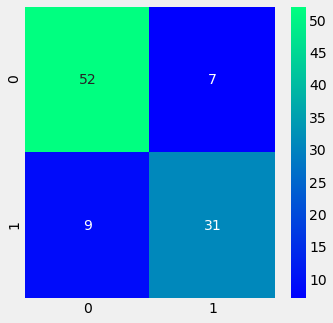

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        59
           1       0.82      0.78      0.79        40

    accuracy                           0.84        99
   macro avg       0.83      0.83      0.83        99
weighted avg       0.84      0.84      0.84        99



In [93]:
from sklearn.ensemble import RandomForestClassifier

model_u = RandomForestClassifier()
model_u.fit(x_train1, y_train1)

y_pred = model_u.predict(x_test1)

print("Training Accuracy: ", model_u.score(x_train1, y_train1))
print('Testing Accuarcy: ', model_u.score(x_test1, y_test1))

# confusion matrix
cm = confusion_matrix(y_test1, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.show()

# classification report
cr = classification_report(y_test1, y_pred)
print(cr)

#### Over Sampling with SMOTE

In [94]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_sample(x, y.values.ravel())

print(x_resample.shape)
print(y_resample.shape)

(1506, 36)
(1506,)


In [95]:
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)

(1204, 36)
(1204,)
(302, 36)
(302,)


In [96]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.transform(x_test2)

Training Accuracy:  1.0
Testing Accuarcy:  0.8841059602649006


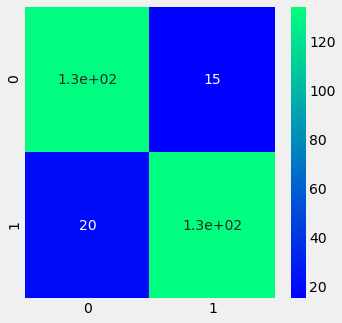

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       148
           1       0.90      0.87      0.88       154

    accuracy                           0.88       302
   macro avg       0.88      0.88      0.88       302
weighted avg       0.88      0.88      0.88       302



In [97]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_o = RandomForestClassifier()
model_o.fit(x_train2, y_train2)

y_pred = model_o.predict(x_test2)

print("Training Accuracy: ", model_o.score(x_train2, y_train2))
print('Testing Accuarcy: ', model_o.score(x_test2, y_test2))

# confusion matrix
cm = confusion_matrix(y_test2, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.show()

# classification report
cr = classification_report(y_test2, y_pred)
print(cr)

# Model Explanation for Random Forest Classifier

In [98]:
from eli5.sklearn import PermutationImportance


perm = PermutationImportance(model, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

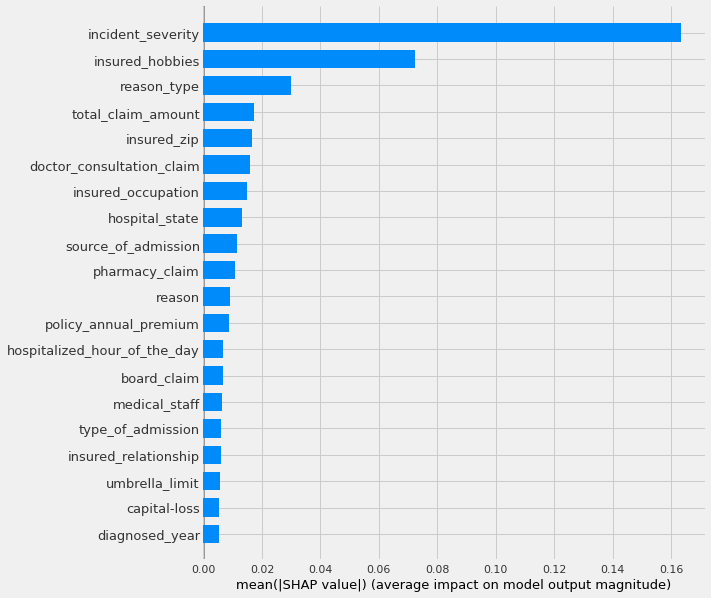

In [99]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values[1], x_test, plot_type="bar")

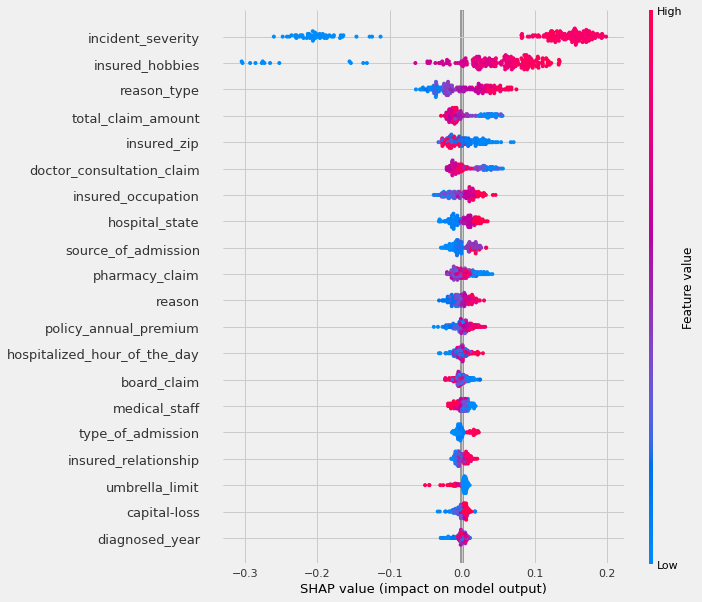

In [100]:
shap.summary_plot(shap_values[1], x_test)

In [101]:
def fraud_analysis(model, fraud):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(fraud)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], fraud)

In [102]:
fraud = x_test.iloc[1,:].astype(float)
fraud_analysis(model, fraud)

In [103]:
fraud = x_test.iloc[2,:].astype(float)
fraud_analysis(model, fraud)

In [104]:
shap_values = explainer.shap_values(x_train.iloc[:50])
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], x_test.iloc[:50])